In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [8]:
X, y = make_blobs(500, centers=2, cluster_std=1.4)
y[y == 0] = -1

In [18]:
def decision_func(X: np.ndarray, y: np.ndarray, b: float, w: np.ndarray) -> np.ndarray:
    return np.dot(X, w) + b

In [19]:
def fit(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    n_samples, n_features = X.shape

    b = 0.0
    w = np.random.random(n_features)
    lr = 0.1
    
    return decision_func(X, y, b, w)

In [84]:
def draw_decision_boundary(X: np.ndarray, y: np.ndarray):
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, X.shape[0]),
                         np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, X.shape[0]))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    pred = fit(X_grid, y).reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contour(xx, yy, pred, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors=['r', 'k', 'r'])
    ax.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

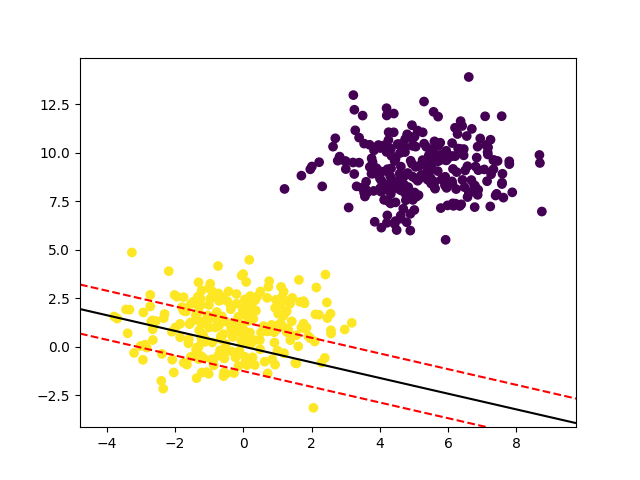

In [85]:
draw_decision_boundary(X, y)